In [4]:

%pip install pdfminer.six pytesseract pdf2image gensim wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import os
import re
from zipfile import ZipFile
from pathlib import Path
from PIL import Image
import pytesseract
from pdfminer.high_level import extract_text
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/himanshu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/himanshu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/himanshu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

SyntaxError: invalid syntax (3176487930.py, line 1)

15_Nazeen andTariq_2019 need to be extracted using OCR technique

In [7]:
def clean_paper(input_file, lst):
    if input_file not in ['Publications/15_Nazneen.pdf', 'Publications/Tariq_2019.pdf']:
        
        paper_text = extract_text(input_file)

        paper_text = re.sub(r'\[Figure \d+\]', '', paper_text)
        paper_text = re.sub(r'\[Table \d+\]', '', paper_text)

        paper_text = re.sub(r'\[\d+\]', '', paper_text)

        lst.append(paper_text)

def clean_all_papers(input_dir):
    lst=[]
    for file_name in os.listdir(input_dir):
        input_file = os.path.join(input_dir, file_name)
        clean_paper(input_file,lst)
    return lst

input_dir = Path("Publications")
# output_dir = Path('kaggle/input/processed-papers')
txts=clean_all_papers(input_dir)


In [8]:

for text in txts:

    # Remove citations
    text = re.sub(r"\[\w+\]", "", text)

    # Remove tables
    text = re.sub(r"Table \d+.*?(?=Table \d+|\Z)", "", text, flags=re.DOTALL)

    # Remove page number mentions
    text = re.sub(r"Sensors \d{4}, \d{2}, \d{4}\n\n\d+ of \d+\n", "", text)

    text = re.sub(r"sensors\(.+?\)\n", "", text)
    


In [ ]:
from PIL import Image
import pytesseract

def extract_text_pytesseract(image_path):
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image)
    return text



In [9]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

processed_txts = []
for txt in txts:
    # Tokenize
    words = nltk.word_tokenize(txt)
    
    # Remove stop words
    words = [word for word in words if word not in stopwords.words('english')]
    
    # Stemming
    words = [stemmer.stem(word) for word in words]
    
    # Lemmatizing
    words = [lemmatizer.lemmatize(word) for word in words]
    
    processed_txts.append(words)

# Create embeddings
model = Word2Vec(processed_txts, min_count=1)

# Get vector for a word
vector = model.wv['autism']




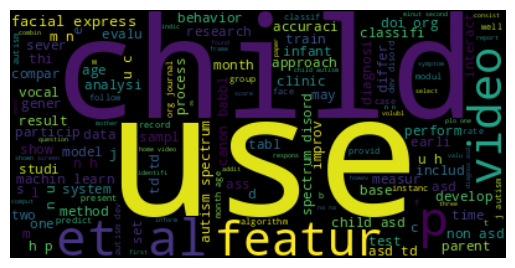

In [15]:
text = ' '.join([' '.join(words) for words in processed_txts])

wordcloud = WordCloud().generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
from langchain_community.embeddings.openai import OpenAIEmbeddings
from langchain_community.vectorstores import FAISS

embeddings = OpenAIEmbeddings()
texts = txts  # replace with your list of extracted texts
faiss = FAISS.from_texts(texts, embeddings)


/home/himanshu/.local/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.embeddings.openai.OpenAIEmbeddings` was deprecated in langchain-community 0.0.9 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


ValidationError: 1 validation error for OpenAIEmbeddings
__root__
  Did not find openai_api_key, please add an environment variable `OPENAI_API_KEY` which contains it, or pass `openai_api_key` as a named parameter. (type=value_error)